In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Coordinates

Container for describing the coordinates of a PODPAC datasource.
Coordinates are created from a list or dict containing BaseCoordinates1d objects (Coordinates1d or StackedCoordinates).

Constructors:

- `Coordinates()`
- `Coordinates([coords1d, coords1d])`
- `Coordinates([StackedCoordinates([coords1d, coords1d]), coords1d])`
- `Coordinates([(coords1d, coords1d), coords1d])`
- `Coordinates([array1d, array1d], dims=['lat', 'lon'])`
- `Coordinates([(array1d, array1d), array], dims=['lat_lon', 'time'])`
- `Coordinates([array2d, array1d], dims=['lat_lon', 'time'])`

Advanced Contructors:

- `Coordinates.from_xarray(xcoords)`: maps multi-dimensional xarray `DataArrayCoordinates` to podpac `Coordinates`
- `Coordinates.grid(...)`
- `Coordinates.points(...)`

In [2]:
import numpy as np
from podpac import Coordinates

### Grid Coordinates

In [3]:
# coordinates specifying a n x n grid
grid_coords = Coordinates([np.linspace(-10, 10, 21), np.linspace(-10, 10, 21)], dims=['lat', 'lon'])

In [4]:
# get tuple of dimensions 
grid_coords.dims

('lat', 'lon')

In [5]:
# get tuple of unstacked dimensions (all individual dimensions)
grid_coords.udims

('lat', 'lon')

In [6]:
# ArrayCoordinates1d within the main Coordinates container
grid_coords['lat']

ArrayCoordinates1d(lat): Bounds[-10.0, 10.0], N[21], ctype['midpoint']

In [7]:
# get array of coordinate values
grid_coords['lat'].coordinates

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [8]:
# get ndims and size of coordinates
print(grid_coords.ndim)
print(grid_coords.size)

2
441


### Stacked Coordinates

In [9]:
# stacked coordinates specifying n data points
stacked_coords = Coordinates([(np.linspace(-10, 10, 21), np.linspace(-10, 10, 21))], dims=['lat_lon'])

In [10]:
# get tuple of dimensions 
stacked_coords.dims

('lat_lon',)

In [11]:
# get tuple of unstacked dimensions (all individual dimensions)
stacked_coords.udims

('lat', 'lon')

In [12]:
# StackedCoordinates within main Coordinates container
stacked_coords['lat_lon']

StackedCoordinates
	lat_lon[lat]: ArrayCoordinates1d(lat): Bounds[-10.0, 10.0], N[21], ctype['midpoint']
	lat_lon[lon]: ArrayCoordinates1d(lon): Bounds[-10.0, 10.0], N[21], ctype['midpoint']

In [13]:
# multi-index array of values
stacked_coords['lat_lon'].coordinates

MultiIndex(levels=[[-10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0], [-10.0, -9.0, -8.0, -7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]],
           codes=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]],
           names=['lat', 'lon'])

In [14]:
# ArrayCoordinates1D within StackedCoordinates
stacked_coords['lat']

ArrayCoordinates1d(lat): Bounds[-10.0, 10.0], N[21], ctype['midpoint']

In [15]:
# Individual coordinate values within StackedCoordinates
stacked_coords['lat'].coordinates

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

### Stacked and Grid Coordinates

In [16]:
# stacked coordinates specifying n data points
hybrid_coords = Coordinates([(np.linspace(-10, 10, 21), np.linspace(-10, 10, 21)), np.linspace(0, 10, 11)], dims=['lat_lon', 'time'])

In [17]:
# get tuple of dimensions 
hybrid_coords.dims

('lat_lon', 'time')

In [18]:
# get tuple of unstacked dimensions (all individual dimensions)
hybrid_coords.udims

('lat', 'lon', 'time')

## Advanced Coordinate Types

### Dependent Coordinates

Dependent coordinates are coordinates defined at a set of N-d input indexes.

In [19]:
from podpac.core.coordinates import RotatedCoordinates

lat = np.linspace(0, 1, 12).reshape(3, 4)
lon = np.linspace(10, 20, 12).reshape(3, 4)

# coerce into DependentCoordinates
c = Coordinates([[lat, lon]], dims=['lat,lon'])
c

Coordinates
	lat,lon[lat]: DependentCoordinates(i,j->lat): Bounds[0.000000, 1.000000], shape(3, 4), ctype[point]
	lat,lon[lon]: DependentCoordinates(i,j->lon): Bounds[10.000000, 20.000000], shape(3, 4), ctype[point]

In [20]:
c['lat'].coordinates

array([[0.        , 0.09090909, 0.18181818, 0.27272727],
       [0.36363636, 0.45454545, 0.54545455, 0.63636364],
       [0.72727273, 0.81818182, 0.90909091, 1.        ]])

In [21]:
c['lon'].coordinates

array([[10.        , 10.90909091, 11.81818182, 12.72727273],
       [13.63636364, 14.54545455, 15.45454545, 16.36363636],
       [17.27272727, 18.18181818, 19.09090909, 20.        ]])

In [22]:
# indexing dimensions
c.idims

('i', 'j')

### Rotated Coordinates

Rotated Coordinates define a gridded coordinate system rotated around an axis.

In [23]:
# using upper left corner and a step/scale
rc = RotatedCoordinates(shape=(4, 3), theta=np.pi/8, origin=[10, 20], step=[2.0, 1.0], dims=['lon', 'lat'])
c = Coordinates([rc], dims=['lon,lat'])
c

Coordinates
	lon,lat[lon]: RotatedCoordinates(i,j->lon): Bounds[10.000000, 16.308644], shape(4, 3), ctype[point]
	lon,lat[lat]: RotatedCoordinates(i,j->lat): Bounds[18.152241, 22.296101], shape(4, 3), ctype[point]

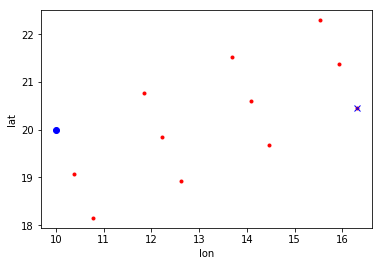

In [24]:
x, y = rc.coordinates
ox, oy = rc.origin
cx, cy = rc.corner
figure()
plot(x, y, 'r.')
plot(ox, oy, 'bo')
plot(cx, cy, 'bx')
xlabel(rc.dims[0])
ylabel(rc.dims[1])
axis('scaled')
show()

In [25]:
# indexing dimensions
c.idims

('i', 'j')

In [26]:
# using upper left corner and lower right corner
rc = RotatedCoordinates(shape=(3, 4), theta=np.pi/4, origin=[10, 20], corner=[15, 17], dims=['lat', 'lon'])
c = Coordinates([rc], dims=['lat,lon'])
c

Coordinates
	lat,lon[lat]: RotatedCoordinates(i,j->lat): Bounds[10.000000, 15.000000], shape(3, 4), ctype[point]
	lat,lon[lon]: RotatedCoordinates(i,j->lon): Bounds[16.000000, 21.000000], shape(3, 4), ctype[point]

In [27]:
# using upper left corner and lower right corner
rc = RotatedCoordinates(shape=(3, 4), theta=np.pi/4, origin=[10, 20], corner=[15, 17], dims=['lat', 'lon'])
c = Coordinates([rc], dims=['lat,lon'])

In [28]:
# to / from gdal geotransform
rc = RotatedCoordinates(shape=(3, 4), theta=np.pi/4, origin=[10, 20], step=[1.0, 2.0], dims=['lat', 'lon'])
c = RotatedCoordinates.from_geotransform(rc.geotransform, rc.shape, dims=rc.dims)
c

RotatedCoordinates(('lat', 'lon')): origin[10. 20.], corner[15.65685425 17.17157288], rad[0.7854], shape(3, 4), ctype['point']

### Polar Coordinates

In [29]:
from podpac.core.coordinates.polar_coordinates import PolarCoordinates

In [30]:
pc = PolarCoordinates(center=[10, 10], radius=[1, 2, 3, 5], theta_size=8, ctypes='point', dims=['lat', 'lon'])
pc

PolarCoordinates(('lat', 'lon')): center[10. 10.], shape(4, 8), ctype['point']

In [31]:
# indexing dimensions
pc.idims

('r', 't')

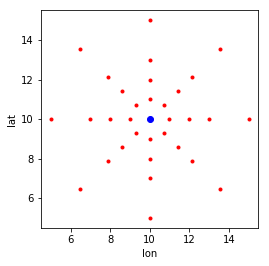

In [32]:
y, x = pc.coordinates
cy, cx = pc.center
figure()
plot(x, y, 'r.')
plot(cx, cy, 'bo')
xlabel(pc.dims[1])
ylabel(pc.dims[0])
axis('scaled')
show()

## Coordinate Operations

### Coordinate Indexing

In [33]:
lat = [0, 1, 2, 3, 5]
lon = [10, 20, 30, 40]
time = ['2018-01-01', '2018-01-02', '2018-01-03']

c = Coordinates([lat, lon, time], dims=['lat', 'lon', 'time'])
c

Coordinates
	lat: ArrayCoordinates1d(lat): Bounds[0.0, 5.0], N[5], ctype['midpoint']
	lon: ArrayCoordinates1d(lon): Bounds[10.0, 40.0], N[4], ctype['midpoint']
	time: ArrayCoordinates1d(time): Bounds[2018-01-01, 2018-01-03], N[3], ctype['point']

In [34]:
# select subset of coordinates by index within dimension
# elements 1 and 3 of lat
# slice 0 to 2 of lon
# element 2 of time
c[[1, 3], slice(0,2), 2]

Coordinates
	lat: ArrayCoordinates1d(lat): Bounds[1.0, 3.0], N[2], ctype['midpoint']
	lon: ArrayCoordinates1d(lon): Bounds[10.0, 20.0], N[2], ctype['midpoint']
	time: ArrayCoordinates1d(time): Bounds[2018-01-03, 2018-01-03], N[1], ctype['point']

In [35]:
# works for stacked coordinates
lat_lon = (np.linspace(0, 10, 11), np.linspace(10, 20, 11))
time = ['2018-01-01', '2018-01-02', '2018-01-03']

c = Coordinates([lat_lon, time], dims=['lat_lon', 'time'])
c

Coordinates
	lat_lon[lat]: ArrayCoordinates1d(lat): Bounds[0.0, 10.0], N[11], ctype['midpoint']
	lat_lon[lon]: ArrayCoordinates1d(lon): Bounds[10.0, 20.0], N[11], ctype['midpoint']
	time: ArrayCoordinates1d(time): Bounds[2018-01-01, 2018-01-03], N[3], ctype['point']

In [36]:
# select the 1st and 3rd element from the stacked coordinates
# select the 2nd element of time
c[[1, 3], 2]

Coordinates
	lat_lon[lat]: ArrayCoordinates1d(lat): Bounds[1.0, 3.0], N[2], ctype['midpoint']
	lat_lon[lon]: ArrayCoordinates1d(lon): Bounds[11.0, 13.0], N[2], ctype['midpoint']
	time: ArrayCoordinates1d(time): Bounds[2018-01-03, 2018-01-03], N[1], ctype['point']

### Coordinate Selection

In [37]:
lat = [0, 1, 2, 3, 5]
lon = [10, 20, 30, 40]
time = ['2018-01-01', '2018-01-02', '2018-01-03']

c = Coordinates([lat, lon, time], dims=['lat', 'lon', 'time'])
c

Coordinates
	lat: ArrayCoordinates1d(lat): Bounds[0.0, 5.0], N[5], ctype['midpoint']
	lon: ArrayCoordinates1d(lon): Bounds[10.0, 40.0], N[4], ctype['midpoint']
	time: ArrayCoordinates1d(time): Bounds[2018-01-01, 2018-01-03], N[3], ctype['point']

In [38]:
c.select({'lat': [1, 3]})

Coordinates
	lat: ArrayCoordinates1d(lat): Bounds[1.0, 3.0], N[3], ctype['midpoint']
	lon: ArrayCoordinates1d(lon): Bounds[10.0, 40.0], N[4], ctype['midpoint']
	time: ArrayCoordinates1d(time): Bounds[2018-01-01, 2018-01-03], N[3], ctype['point']

In [39]:
c.select({'lat': [1, 3]})
c.select({'lat': [1, 3], 'lon': [15, 25]})
c.select({'alt': [1, 3]}) # no affect

Coordinates
	lat: ArrayCoordinates1d(lat): Bounds[0.0, 5.0], N[5], ctype['midpoint']
	lon: ArrayCoordinates1d(lon): Bounds[10.0, 40.0], N[4], ctype['midpoint']
	time: ArrayCoordinates1d(time): Bounds[2018-01-01, 2018-01-03], N[3], ctype['point']